In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("weather.csv")


In [2]:
print(df)

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1      

In [3]:
print(df.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [4]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [5]:
df=df.dropna()


In [6]:
print(df.isnull().sum())


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [7]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
Y=df.RainTomorrow
print(Y.head())


0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: RainTomorrow, dtype: object


In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['RainTomorrow']=label_encoder.fit_transform(df['RainTomorrow'])
print(df['RainTomorrow'].unique())
label_encoder=preprocessing.LabelEncoder()
df['WindGustDir']=label_encoder.fit_transform(df['WindGustDir'])
print(df['WindGustDir'].unique())
label_encoder=preprocessing.LabelEncoder()
df['RainToday']=label_encoder.fit_transform(df['RainToday'])
print(df['RainToday'].unique())


[1 0]
[ 7  1 10  9  0  8  3 14  2  4  5  6 12 13 15 11]
[0 1]


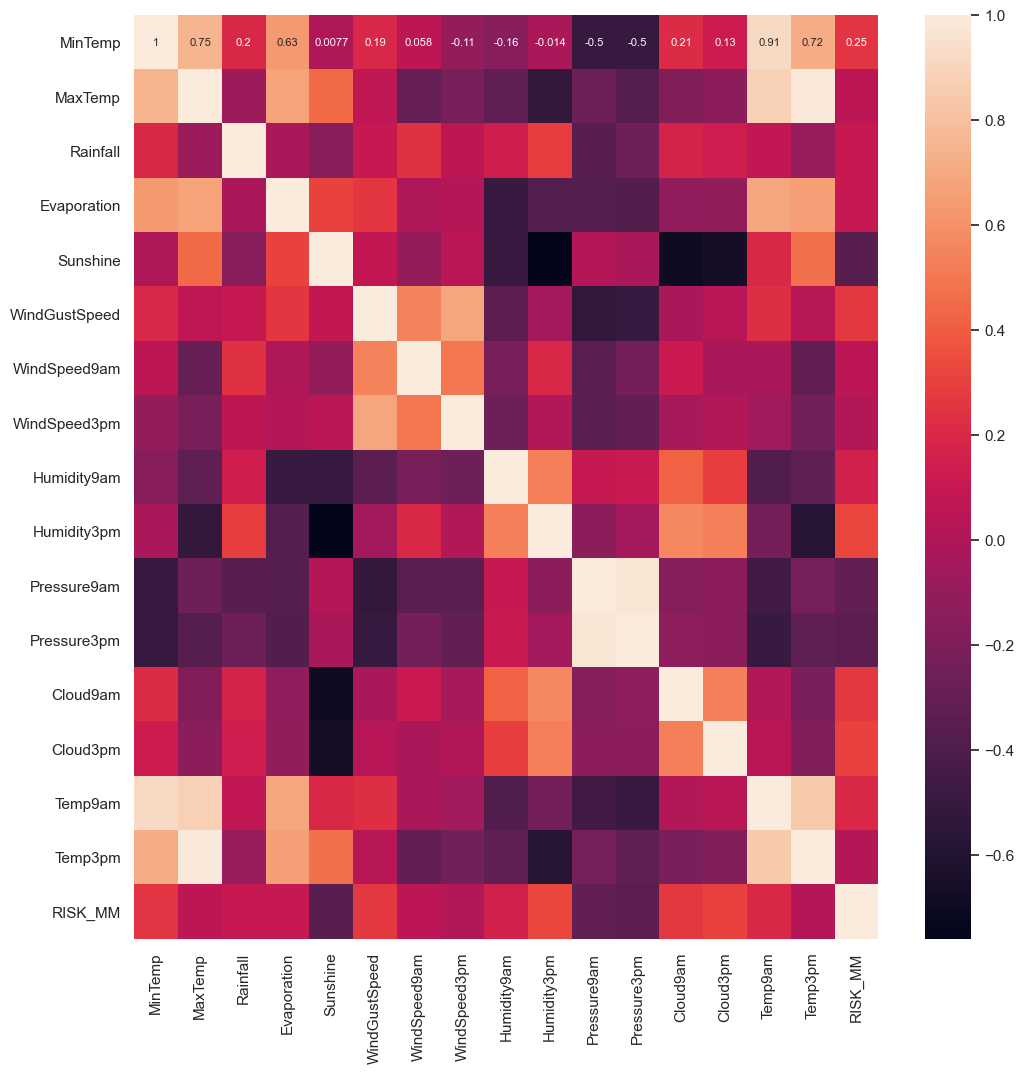

In [11]:
numeric_columns = df.select_dtypes(include=['float64',
'int64']).columns
correlation_matrix = df[numeric_columns].corr()
hm = sns.heatmap(data=correlation_matrix, annot=True,
annot_kws={'size': 8})
sns.set(rc={'figure.figsize': (12, 12)})
plt.show()
# Drop non-numeric columns before further processing
X = df.drop(columns=['WindGustDir', 'RainToday', 'RainTomorrow'])


In [12]:
print(X.head())




   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0         SW         NW           6.0            20           68           29   
1          E          W           4.0            17           80           36   
2          N        NNE           6.0             6           82           69   
3        WNW          W          30.0            24           62           56   
4        SSE        ESE          20.0            28           68           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
# Assuming df is your DataFrame and Y is your target variable
# Select features and target variable
X = df.drop(columns=['WindGustDir', 'RainToday', 'RainTomorrow'])
Y = df['RainTomorrow']
# Perform one-hot encoding
X_encoded = pd.get_dummies(X)
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y,
test_size=0.2, random_state=10)
# Train the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
# Make predictions
Y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
model=svm.SVC(kernel='poly')
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

Accuracy: 0.9696969696969697


In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))


Accuracy: 0.9090909090909091
